In [4]:
import os

### Exploración de datos

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import wave
import pandas as pd

# Función para graficar archivo WAV
def plot_wav(filename):
    # Abre el archivo WAV
    with wave.open(filename, 'rb') as wf:
        # Obtiene los parámetros del archivo WAV
        params = wf.getparams()
        nchannels, sampwidth, framerate, nframes = params[:4]
        
        # Lee los frames y convierte a array
        str_data = wf.readframes(nframes)
        waveform = np.frombuffer(str_data, dtype=np.int16)
        
        # Si es estéreo (2 canales), toma sólo un canal
        if nchannels == 2:
            waveform = waveform[::2]
        
        # Crea una lista de tiempos para el eje X
        time = np.linspace(0, nframes/framerate, nframes)

        # Grafica la forma de onda
        plt.figure(figsize=(12, 6))
        plt.plot(time, waveform)
        plt.title("Waveform of " + "H4")
        plt.xlabel("Time (s)")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.savefig(filename+".png")
        plt.show()
        

def get_max_peak(filename):
    # Abre el archivo WAV
    with wave.open(filename, 'rb') as wf:
        # Obtiene los parámetros del archivo WAV
        params = wf.getparams()
        nchannels, sampwidth, framerate, nframes = params[:4]
        
        # Lee los frames y convierte a array
        str_data = wf.readframes(nframes)
        waveform = np.frombuffer(str_data, dtype=np.int16)
        
        # Si es estéreo (2 canales), toma sólo un canal
        if nchannels == 2:
            waveform = waveform[::2]
        
        # Encuentra el índice del valor máximo
        max_idx = np.argmax(np.abs(waveform))
        
        # Calcula el tiempo en el que ocurre este pico
        max_time = max_idx / framerate
        max_value = waveform[max_idx]
        
        return max_value, max_time



# Función para crear DataFrame para cada grupo
def create_dataframe(file_list):
    path = "C:/Users/jjalf/Documents/Retos cientificos/Data/Angelica/"
    peaks = []
    times = []
    for file in file_list:
        peak, time = get_max_peak(path+file)
        peaks.append(peak)
        times.append(time)
    df = pd.DataFrame({
        'Peak': peaks,
        'Time (s)': times
    })
    df.loc['Average'] = df.mean()
    return df



In [52]:

# Listas de archivos para cada grupo
files_H1 = [f"H1_{str(i).zfill(2)}.wav" for i in range(1, 16)]
files_H2 = [f"H2_{str(i).zfill(2)}.wav" for i in range(1, 16)]
files_H3 = [f"H3_{str(i).zfill(2)}.wav" for i in range(1, 16)]
files_H4 = [f"H4_{str(i).zfill(2)}.wav" for i in range(1, 18)]  # Nota: H4 tiene hasta 17
#files_Hmax = [f"Hmax{str(i).zfill(2)}.wav" for i in range(1, 12)]

# Crear DataFrames
df_H1 = create_dataframe(files_H1)
df_H2 = create_dataframe(files_H2)
df_H3 = create_dataframe(files_H3)
df_H4 = create_dataframe(files_H4)
#df_Hmax = create_dataframe(files_Hmax)

# Mostrar uno de ellos como ejemplo
print(df_H1)

                 Peak  Time (s)
0        26655.000000  0.998437
1        32165.000000  1.370812
2        30070.000000  1.131438
3       -28338.000000  1.174958
4       -26584.000000  0.667312
5       -26061.000000  0.598417
6       -27918.000000  1.162438
7        25123.000000  0.477292
8        28307.000000  1.193271
9        29628.000000  0.853167
10      -24646.000000  1.487208
11      -31343.000000  0.621750
12       30788.000000  0.867104
13       29852.000000  0.975979
14       32767.000000  0.897833
Average   6697.666667  0.965161


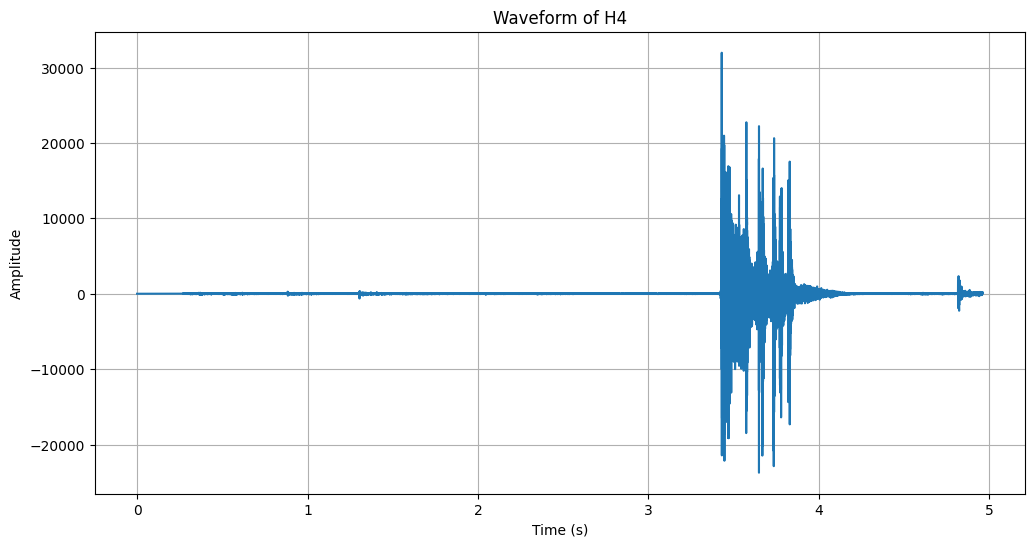

The highest peak is 31964 and it occurs at 3.43 seconds.


In [53]:
# Directorio donde se encuentran los archivos 
src_folder = "C:/Users/jjalf/Documents/Retos cientificos/Data/Angelica"

# Lista todos los archivos .m4a en la carpeta especificada
files = [f for f in os.listdir(src_folder)]

    # Ruta al archivo WAV que deseas graficar
    
file = "C:/Users/jjalf/Documents/Retos cientificos/Data/Angelica/H4_06.wav"
plot_wav(file)

max_value, max_time = get_max_peak(file)

print(f"The highest peak is {max_value} and it occurs at {max_time:.2f} seconds.")
